In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tifffile
import os
from PIL import Image
from numpy import asarray
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout, Conv2DTranspose, concatenate, Flatten
from tensorflow.keras import Input
from tensorflow.keras import layers, Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [5]:
image = Image.open('../data/ground truth/0060c0a5_agbm.tif')
 
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

TIFF
(256, 256)
F


In [6]:
from numpy import asarray
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(image)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(256, 256)


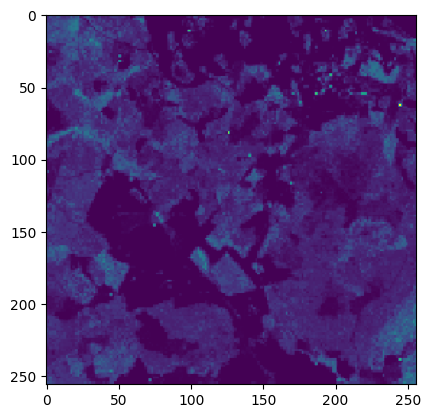

In [7]:
plt.imshow(numpydata)

In [11]:
numpydata = numpydata[np.newaxis,  :, :]

In [12]:
"""
input 1 = s1
input 2 = s2


now it's time to seperate s1 and s2 images!
"""

"\ninput 1 = s1\ninput 2 = s2\n\n\nnow it's time to seperate s1 and s2 images!\n"

In [16]:
def get_X(sat_type='s1'):                                 #gets X from both satellites, depending on value for
    X = []                                                #sat_type variable. Also normalizes the images instantly. 
    basepath1 =  '../data/train data/s1'                  #Have to make one for target/ground truth
    basepath2 =  '../data/train data/s2'
    scaler = MinMaxScaler()
    if sat_type=='s1':
        for file in os.listdir(basepath1):
            path = os.path.join(basepath1, file)
            img = tifffile.imread(path)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X.append(img)
    elif sat_type=='s2':
        for file in os.listdir(basepath2):
            path = os.path.join(basepath2, file)
            img = tifffile.imread(path)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X.append(img)
    else:
        print("Are you high or something? This isn't that hard.")
    return np.asarray(X)

In [3]:
def get_trainchip_ids():
    chip_ids = []
    basepath = '../raw_data/Train/Chip_Id'
    for x in os.listdir(basepath):
        chip_ids.append(x)
    return chip_ids

In [120]:
def get_Xs(n_chips=100, chip_ids=get_trainchip_ids()):
    X1 = []
    X2 = []
    basepath = '../raw_data/Train/Chip_Id/'
    for x in range(0,n_chips):
        path = os.path.join(basepath, chip_ids[x])
        path1_1 = os.path.join(path, 'S1')
        path1_2 = os.path.join(path, 'S2')
        files_list = [file for file in os.listdir(path1_1)]
        files_list.sort()
        files_f = files_list[-5:]
        for x in range(0,len(files_f)):
            path2_1 = os.path.join(path1_1, files_f[x])
            img = tifffile.imread(path2_1)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X1.append(img)
        files_list = [file for file in os.listdir(path1_2)]
        files_list.sort()
        files_f = files_list[-5:]
        for x in range(0,len(files_f)):
            path2_2 = os.path.join(path1_2, files_f[x])
            img = tifffile.imread(path2_2)
            img = tf.image.per_image_standardization(img)
            img = tf.expand_dims(img,axis=0)
            X2.append(img)
    return np.asarray(X1), np.asarray(X2)

In [ ]:
0 setp
1 otc
2 nov
3 dec
4 jan
5 feb
6 mar
7 apr
8 may
9 jun
10 jul
11 aug 


In [17]:
def get_y(n_chips=100, chip_ids=get_trainchip_ids()):
    y = []
    basepath = '../raw_data/Train/Chip_Id/'
    for x in range(0,n_chips):
        path = os.path.join(basepath, chip_ids[x])
        path1 = os.path.join(path, 'GroundTruth')
        for file in os.listdir(path1):
            path2 = os.path.join(path1, file)
            img = tifffile.imread(path2)
            img = tf.expand_dims(img,axis=0)
            y.append(img)
    return np.asarray(y)

In [237]:
y = get_y(200)

In [100]:
basepath = '../raw_data/Train/Chip_Id/'
path = os.path.join(basepath, chip_ids[100])
path1_1 = os.path.join(path, 'S1')
path1_2 = os.path.join(path, 'S2')
files_list = [file for file in os.listdir(path1_2)]
files_list.sort()
files_f = files_list[-5:]

In [196]:
len(chip_ids)

8690

In [102]:
files_list

['f4a17e04_S2_06.tif',
 'f4a17e04_S2_07.tif',
 'f4a17e04_S2_08.tif',
 'f4a17e04_S2_09.tif',
 'f4a17e04_S2_10.tif',
 'f4a17e04_S2_11.tif']

In [103]:
files_f

['f4a17e04_S2_07.tif',
 'f4a17e04_S2_08.tif',
 'f4a17e04_S2_09.tif',
 'f4a17e04_S2_10.tif',
 'f4a17e04_S2_11.tif']

In [208]:
len(y)

200

In [223]:
y.shape

(200, 1, 256, 256)

In [28]:
len(X1)

600

In [27]:
len(X2)

495

In [4]:
chip_ids = get_trainchip_ids()

In [5]:
chip_ids

['2e1ea65c',
 '0058fedc',
 '80201e73',
 '1d7700eb',
 '9512f5f3',
 '82b64c90',
 '9c622a17',
 'e176b9b9',
 '43481cbb',
 '4aa639ec',
 'f60082f5',
 '17058554',
 '28fd5484',
 '2190eda5',
 'c2400457',
 '9870cd44',
 'b25d4119',
 '583086ce',
 'dbba33ea',
 '16b80308',
 'a3af2825',
 'f2db00dd',
 'aae569ac',
 '9388f561',
 '3d8654dc',
 '804f3ba8',
 '56274ceb',
 'f7f98481',
 'a154dbbc',
 '86e8c394',
 'f5487cff',
 '22db73e4',
 'fc450d9d',
 '2c1e31f8',
 '6dc54a52',
 '27194589',
 '109560c3',
 '566d4c1e',
 'd3a2645b',
 'dc65c754',
 '74d2eb17',
 'c63a71e3',
 '150b249d',
 'd02be9ae',
 'da126f40',
 'ff374b38',
 '4d27a2c8',
 'a36766f9',
 'a033f1d5',
 '4ec658dc',
 '3eeffa8a',
 'e6f21c39',
 '934b03ee',
 '7123e5f5',
 'faa49565',
 'ab8f4064',
 '4ba93143',
 '628aa4ac',
 '56d2d95b',
 'ec555861',
 '603fdcac',
 '893c3cd5',
 '982caba9',
 '1c86e26b',
 '9aa97a9f',
 '85491a3a',
 '712afd7b',
 'd41bde89',
 'a92f468a',
 '520eeb54',
 '9255cdfb',
 'c96ceb57',
 'ec31a809',
 'a53c9f32',
 '0de54a5e',
 '52f2b7a1',
 'd553bb5a',

In [234]:
X1, X2 = get_Xs(200)

In [235]:
X1.shape

(1000, 1, 256, 256, 4)

In [236]:
X2.shape

(1000, 1, 256, 256, 11)

In [155]:
len(X1)

250

In [238]:
X1_train = X1[0:700]

In [239]:
X1_train.shape

(700, 1, 256, 256, 4)

In [240]:
X1_test = X1[-300:]

In [241]:
X1_test.shape

(300, 1, 256, 256, 4)

In [156]:
250*0.3

75.0

In [242]:
X2_train = X2[0:700]

In [243]:
X2_test = X2[-300:]

In [244]:
y_train = y[0:140]

In [245]:
y_test= y[-60:]

In [246]:
len(y_train)

140

In [247]:
def init_model(start_n):
    
    input1 = Input(shape=(256,256,4))
    input2 = Input(shape=(256,256,11))

    conv1 = Conv2D(start_n * 1, (4, 4), activation="relu", padding="same")(input1)
    conv1_1 = Conv2D(start_n * 1, (4, 4), activation="relu", padding="same")(input2)
    conv1 = concatenate([conv1, conv1_1])
    conv1 = Conv2D(start_n * 1, (4, 4), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_n * 2, (4, 4), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_n * 2, (4, 4), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    
    convm = Conv2D(start_n * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_n * 16, (3, 3), activation="relu", padding="same")(convm)
    
    deconv4 = Conv2DTranspose(start_n * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_n * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_n * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_n * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_n * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_n * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_n * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_n * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_n * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_n * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
    output_layer = Conv2D(1, (1,1), padding="same", activation="linear")(uconv1)

    model = Model(inputs=[input1, input2], outputs = [output_layer])
    
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mse'])

    return model

In [249]:
def fit_model(model,X1, X2, y):
    es = EarlyStopping(restore_best_weights = True)
    i = 0
    while i <= len(y)-1: 
        for x in range(0, len(X1)-1):
            history = model.fit([X1[x],X2[x]], y[i], verbose = 1, epochs = 5, callbacks = [es])
            if (x+1)%5==0:
                i+=1
        if i == len(y)-1:
            print("The model is done Training!")
            break
    return model, history

In [250]:
j = 0
for i in range(20):
    if (i+1)% 5 == 0:
        j += 1
    print (i, j)

0 0
1 0
2 0
3 0
4 1
5 1
6 1
7 1
8 1
9 2
10 2
11 2
12 2
13 2
14 3
15 3
16 3
17 3
18 3
19 4


In [263]:
model = init_model(32)

In [264]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 input_22 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                1)]                                                               
                                                                                                  
 conv2d_200 (Conv2D)            (None, 256, 256, 32  2080        ['input_21[0][0]']               
                                )                                                          

                                                                                                  
 conv2d_transpose_42 (Conv2DTra  (None, 128, 128, 64  73792      ['conv2d_214[0][0]']             
 nspose)                        )                                                                 
                                                                                                  
 concatenate_53 (Concatenate)   (None, 128, 128, 12  0           ['conv2d_transpose_42[0][0]',    
                                8)                                'conv2d_204[0][0]']             
                                                                                                  
 dropout_86 (Dropout)           (None, 128, 128, 12  0           ['concatenate_53[0][0]']         
                                8)                                                                
                                                                                                  
 conv2d_21

In [265]:
model, history = fit_model(model, X1_train,X2_train, y_train)

Epoch 1/5


2022-12-05 14:29:30.923156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 4689.0342 - mse: 4689.0342
Epoch 2/5
1/1 [==============================] - 0s 98ms/step - loss: 45209.5312 - mse: 45209.5312
Epoch 3/5
1/1 [==============================] - 0s 145ms/step - loss: 4683.3701 - mse: 4683.3701
Epoch 4/5
1/1 [==============================] - 0s 130ms/step - loss: 4677.7705 - mse: 4677.7705
Epoch 5/5
1/1 [==============================] - 0s 150ms/step - loss: 4673.7925 - mse: 4673.7925
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4672.1475 - mse: 4672.1475
Epoch 2/5
1/1 [==============================] - 0s 105ms/step - loss: 4668.5684 - mse: 4668.5684
Epoch 3/5
1/1 [==============================] - 0s 100ms/step - loss: 4664.3848 - mse: 4664.3848
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 4659.1084 - mse: 4659.1084
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 4652.0361 - mse: 4652.0361
Epoch 1/5
1/1 [====================

1/1 [==============================] - 0s 147ms/step - loss: 2346.5835 - mse: 2346.5835
Epoch 4/5
1/1 [==============================] - 0s 108ms/step - loss: 2339.1616 - mse: 2339.1616
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2332.1121 - mse: 2332.1121
Epoch 1/5
1/1 [==============================] - 0s 157ms/step - loss: 2325.2031 - mse: 2325.2031
Epoch 2/5
1/1 [==============================] - 0s 97ms/step - loss: 2319.1931 - mse: 2319.1931
Epoch 3/5
1/1 [==============================] - 0s 136ms/step - loss: 2313.1465 - mse: 2313.1465
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2306.9160 - mse: 2306.9160
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2300.2295 - mse: 2300.2295
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 2333.9990 - mse: 2333.9990
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2330.2805 - mse: 2330.2805
Epoch 3/5
1/1 [=====================

1/1 [==============================] - 0s 90ms/step - loss: 15010.6934 - mse: 15010.6934
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 16674.2891 - mse: 16674.2891
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 16617.9180 - mse: 16617.9180
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 16557.8125 - mse: 16557.8125
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 16488.3672 - mse: 16488.3672
Epoch 5/5
1/1 [==============================] - 0s 118ms/step - loss: 16404.8848 - mse: 16404.8848
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 16293.0742 - mse: 16293.0742
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 16153.1562 - mse: 16153.1562
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 15962.6348 - mse: 15962.6348
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 15680.7119 - mse: 15680.7119
Epoch 5/5
1/1 [====

1/1 [==============================] - 0s 90ms/step - loss: 2659.3809 - mse: 2659.3809
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1631.2863 - mse: 1631.2863
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1444.1777 - mse: 1444.1777
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1379.8862 - mse: 1379.8862
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1370.5665 - mse: 1370.5665
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 1700.5564 - mse: 1700.5564
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1522.9683 - mse: 1522.9683
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1935.9144 - mse: 1935.9144
Epoch 5/5
1/1 [==============================] - 0s 100ms/step - loss: 1281.2567 - mse: 1281.2567
Epoch 1/5
1/1 [==============================] - 0s 98ms/step - loss: 1264.4788 - mse: 1264.4788
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 12032.5869 - mse: 12032.5869
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 10501.4355 - mse: 10501.4355
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 8866.3906 - mse: 8866.3906
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 8515.9258 - mse: 8515.9258
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 8418.6055 - mse: 8418.6055
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 8359.4570 - mse: 8359.4570
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 8392.6328 - mse: 8392.6328
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 8395.4658 - mse: 8395.4658
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 8575.6777 - mse: 8575.6777
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 8266.4785 - mse: 8266.4785
Epoch 4/5
1/1 [=====================

1/1 [==============================] - 0s 90ms/step - loss: 4101.2998 - mse: 4101.2998
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4090.8918 - mse: 4090.8918
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4056.4834 - mse: 4056.4834
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 4140.2017 - mse: 4140.2017
Epoch 5/5
1/1 [==============================] - 0s 110ms/step - loss: 4290.5283 - mse: 4290.5283
Epoch 1/5
1/1 [==============================] - 0s 95ms/step - loss: 5619.9263 - mse: 5619.9263
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 4702.3066 - mse: 4702.3066
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 5692.4106 - mse: 5692.4106
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 4489.3667 - mse: 4489.3667
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 5093.6875 - mse: 5093.6875
Epoch 1/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 2111.7224 - mse: 2111.7224
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2156.6443 - mse: 2156.6443
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 3496.7163 - mse: 3496.7163
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 4389.2471 - mse: 4389.2471
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 3493.5454 - mse: 3493.5454
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2725.1396 - mse: 2725.1396
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2246.3726 - mse: 2246.3726
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2197.2871 - mse: 2197.2871
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2158.5913 - mse: 2158.5913
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2134.7041 - mse: 2134.7041
Epoch 3/5
1/1 [=========================

1/1 [==============================] - 0s 89ms/step - loss: 1049.0416 - mse: 1049.0416
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1713.2017 - mse: 1713.2017
Epoch 2/5
1/1 [==============================] - 0s 135ms/step - loss: 1502.3599 - mse: 1502.3599
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1234.6066 - mse: 1234.6066
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1194.1176 - mse: 1194.1176
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1625.1775 - mse: 1625.1775
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2392.6528 - mse: 2392.6528
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1885.1117 - mse: 1885.1117
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1580.4679 - mse: 1580.4679
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1580.4956 - mse: 1580.4956
Epoch 5/5
1/1 [========================

Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2707.0808 - mse: 2707.0808
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2939.1614 - mse: 2939.1614
Epoch 5/5
1/1 [==============================] - 0s 120ms/step - loss: 3056.2568 - mse: 3056.2568
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4117.5332 - mse: 4117.5332
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3535.1611 - mse: 3535.1611
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3502.1802 - mse: 3502.1802
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3406.8308 - mse: 3406.8308
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3412.6082 - mse: 3412.6082
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 8631.0312 - mse: 8631.0312
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 786.2725 - mse: 786.2725
Epoch 3/5
1/1 [================

1/1 [==============================] - 0s 90ms/step - loss: 716.5592 - mse: 716.5592
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 711.9558 - mse: 711.9558
Epoch 2/5
1/1 [==============================] - 0s 94ms/step - loss: 685.8988 - mse: 685.8988
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 643.3687 - mse: 643.3687
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 624.4157 - mse: 624.4157
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 613.3703 - mse: 613.3703
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 2661.5813 - mse: 2661.5813
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1337.3777 - mse: 1337.3777
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 785.2751 - mse: 785.2751
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 874.4295 - mse: 874.4295
Epoch 5/5
1/1 [==============================] - 0s 89ms

1/1 [==============================] - 0s 89ms/step - loss: 548.0967 - mse: 548.0967
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 538.1425 - mse: 538.1425
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 549.4729 - mse: 549.4729
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 494.4933 - mse: 494.4933
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 336.1773 - mse: 336.1773
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 292.3234 - mse: 292.3234
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 522.0941 - mse: 522.0941
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 275.2404 - mse: 275.2404
Epoch 1/5
1/1 [==============================] - 0s 103ms/step - loss: 252.8957 - mse: 252.8957
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 227.9069 - mse: 227.9069
Epoch 3/5
1/1 [==============================] - 0s 90ms/st

1/1 [==============================] - 0s 90ms/step - loss: 338.9955 - mse: 338.9955
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 6914.0752 - mse: 6914.0752
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2879.1809 - mse: 2879.1809
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 17600.1543 - mse: 17600.1543
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 4984.6914 - mse: 4984.6914
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3953.7983 - mse: 3953.7983
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3648.1995 - mse: 3648.1995
Epoch 2/5
1/1 [==============================] - 0s 137ms/step - loss: 2874.7529 - mse: 2874.7529
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2592.7461 - mse: 2592.7461
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2499.1025 - mse: 2499.1025
Epoch 5/5
1/1 [========================

Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 631.2539 - mse: 631.2539
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 622.4869 - mse: 622.4869
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 616.4686 - mse: 616.4686
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 543.8292 - mse: 543.8292
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 528.1132 - mse: 528.1132
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 523.6477 - mse: 523.6477
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 520.3639 - mse: 520.3639
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 517.4563 - mse: 517.4563
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 997.6432 - mse: 997.6432
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 977.7264 - mse: 977.7264
Epoch 3/5
1/1 [==============================] - 0

1/1 [==============================] - 0s 89ms/step - loss: 793.2423 - mse: 793.2423
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1401.3419 - mse: 1401.3419
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 787.6233 - mse: 787.6233
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 723.5518 - mse: 723.5518
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 733.6755 - mse: 733.6755
Epoch 5/5
1/1 [==============================] - 0s 97ms/step - loss: 682.9244 - mse: 682.9244
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 686.0668 - mse: 686.0668
Epoch 2/5
1/1 [==============================] - 0s 117ms/step - loss: 739.1428 - mse: 739.1428
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 736.8956 - mse: 736.8956
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 648.7123 - mse: 648.7123
Epoch 5/5
1/1 [==============================] - 0s 90ms/

1/1 [==============================] - 0s 90ms/step - loss: 1176.1801 - mse: 1176.1801
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1134.1617 - mse: 1134.1617
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1200.2528 - mse: 1200.2528
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 3285.3262 - mse: 3285.3262
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3122.6816 - mse: 3122.6816
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2196.3120 - mse: 2196.3120
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2102.5781 - mse: 2102.5781
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2018.7478 - mse: 2018.7478
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1772.7804 - mse: 1772.7804
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1727.5421 - mse: 1727.5421
Epoch 3/5
1/1 [=========================

1/1 [==============================] - 0s 89ms/step - loss: 22887.0332 - mse: 22887.0332
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 21663.5938 - mse: 21663.5938
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 21433.5996 - mse: 21433.5996
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 21178.0508 - mse: 21178.0508
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 20853.7227 - mse: 20853.7227
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 20238.7422 - mse: 20238.7422
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 19118.1289 - mse: 19118.1289
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 18259.5254 - mse: 18259.5254
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 17386.4102 - mse: 17386.4102
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 17159.2383 - mse: 17159.2383
Epoch 5/5
1/1 [=====

1/1 [==============================] - 0s 91ms/step - loss: 3224.3542 - mse: 3224.3542
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3186.0962 - mse: 3186.0962
Epoch 4/5
1/1 [==============================] - 0s 102ms/step - loss: 3146.3970 - mse: 3146.3970
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 3099.4719 - mse: 3099.4719
Epoch 1/5
1/1 [==============================] - 0s 101ms/step - loss: 3024.2246 - mse: 3024.2246
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2978.1101 - mse: 2978.1101
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2933.5610 - mse: 2933.5610
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3039.2783 - mse: 3039.2783
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2989.7092 - mse: 2989.7092
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3103.6716 - mse: 3103.6716
Epoch 2/5
1/1 [=======================

1/1 [==============================] - 0s 94ms/step - loss: 1328.2487 - mse: 1328.2487
Epoch 5/5
1/1 [==============================] - 0s 94ms/step - loss: 1324.6145 - mse: 1324.6145
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 2036.8958 - mse: 2036.8958
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 1902.0154 - mse: 1902.0154
Epoch 3/5
1/1 [==============================] - 0s 93ms/step - loss: 1842.7999 - mse: 1842.7999
Epoch 4/5
1/1 [==============================] - 0s 96ms/step - loss: 1812.0748 - mse: 1812.0748
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 1795.3586 - mse: 1795.3586
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3280.7947 - mse: 3280.7947
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2454.5537 - mse: 2454.5537
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2319.1030 - mse: 2319.1030
Epoch 4/5
1/1 [=========================

1/1 [==============================] - 0s 93ms/step - loss: 1763.7792 - mse: 1763.7792
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2794.2349 - mse: 2794.2349
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1940.1831 - mse: 1940.1831
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1754.0607 - mse: 1754.0607
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1739.1715 - mse: 1739.1715
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 2459.1489 - mse: 2459.1489
Epoch 2/5
1/1 [==============================] - 0s 115ms/step - loss: 2015.0317 - mse: 2015.0317
Epoch 3/5
1/1 [==============================] - 0s 93ms/step - loss: 1902.9005 - mse: 1902.9005
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 1861.7097 - mse: 1861.7097
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 1838.2854 - mse: 1838.2854
Epoch 1/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 2947.8501 - mse: 2947.8501
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3044.4038 - mse: 3044.4038
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3818.5117 - mse: 3818.5117
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4459.4683 - mse: 4459.4683
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 4464.6177 - mse: 4464.6177
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3138.9438 - mse: 3138.9438
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 3072.0527 - mse: 3072.0527
Epoch 5/5
1/1 [==============================] - 0s 101ms/step - loss: 3005.9219 - mse: 3005.9219
Epoch 1/5
1/1 [==============================] - 0s 93ms/step - loss: 4251.5381 - mse: 4251.5381
Epoch 2/5
1/1 [==============================] - 0s 92ms/step - loss: 3274.4009 - mse: 3274.4009
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 2953.3418 - mse: 2953.3418
Epoch 1/5
1/1 [==============================] - 0s 100ms/step - loss: 4687.6919 - mse: 4687.6919
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4083.7720 - mse: 4083.7720
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 4427.7539 - mse: 4427.7539
Epoch 4/5
1/1 [==============================] - 0s 109ms/step - loss: 4652.6680 - mse: 4652.6680
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 5480.9995 - mse: 5480.9995
Epoch 1/5
1/1 [==============================] - 0s 93ms/step - loss: 7769.5156 - mse: 7769.5156
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 5858.0635 - mse: 5858.0635
Epoch 3/5
1/1 [==============================] - 0s 93ms/step - loss: 5371.2671 - mse: 5371.2671
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 5127.4341 - mse: 5127.4341
Epoch 5/5
1/1 [=======================

1/1 [==============================] - 0s 89ms/step - loss: 4519.0728 - mse: 4519.0728
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4463.1562 - mse: 4463.1562
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 4425.7930 - mse: 4425.7930
Epoch 5/5
1/1 [==============================] - 0s 93ms/step - loss: 4408.9404 - mse: 4408.9404
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 12397.7168 - mse: 12397.7168
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 4757.7358 - mse: 4757.7358
Epoch 3/5
1/1 [==============================] - 0s 93ms/step - loss: 3387.2522 - mse: 3387.2522
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 3200.3330 - mse: 3200.3330
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 3077.1890 - mse: 3077.1890
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 3641.1738 - mse: 3641.1738
Epoch 2/5
1/1 [=======================

1/1 [==============================] - 0s 90ms/step - loss: 2787.9004 - mse: 2787.9004
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2874.0215 - mse: 2874.0215
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3341.5701 - mse: 3341.5701
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2632.7869 - mse: 2632.7869
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1266.6829 - mse: 1266.6829
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 931.8146 - mse: 931.8146
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 871.4393 - mse: 871.4393
Epoch 1/5
1/1 [==============================] - 0s 100ms/step - loss: 813.4710 - mse: 813.4710
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 796.1959 - mse: 796.1959
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 784.3494 - mse: 784.3494
Epoch 4/5
1/1 [==============================] - 

1/1 [==============================] - 0s 90ms/step - loss: 1128.1543 - mse: 1128.1543
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1412.8427 - mse: 1412.8427
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1471.3932 - mse: 1471.3932
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 682.4259 - mse: 682.4259
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 667.6954 - mse: 667.6954
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 713.1660 - mse: 713.1660
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 682.7949 - mse: 682.7949
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 677.9319 - mse: 677.9319
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 672.1390 - mse: 672.1390
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 671.5613 - mse: 671.5613
Epoch 1/5
1/1 [==============================] - 0s 90

1/1 [==============================] - 0s 91ms/step - loss: 4078.2358 - mse: 4078.2358
Epoch 5/5
1/1 [==============================] - 0s 120ms/step - loss: 3817.0593 - mse: 3817.0593
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4299.1665 - mse: 4299.1665
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4189.0640 - mse: 4189.0640
Epoch 3/5
1/1 [==============================] - 0s 117ms/step - loss: 4850.4473 - mse: 4850.4473
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3283.6960 - mse: 3283.6960
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3172.1411 - mse: 3172.1411
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3637.3560 - mse: 3637.3560
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 3568.3821 - mse: 3568.3821
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3208.5396 - mse: 3208.5396
Epoch 4/5
1/1 [=======================

1/1 [==============================] - 0s 90ms/step - loss: 9320.6309 - mse: 9320.6309
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 8255.1191 - mse: 8255.1191
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 7326.1440 - mse: 7326.1440
Epoch 4/5
1/1 [==============================] - 0s 114ms/step - loss: 6695.6782 - mse: 6695.6782
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 6355.9937 - mse: 6355.9937
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5739.2437 - mse: 5739.2437
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 5460.5376 - mse: 5460.5376
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 5353.1934 - mse: 5353.1934
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 5256.2817 - mse: 5256.2817
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 5159.3994 - mse: 5159.3994
Epoch 1/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 1233.5049 - mse: 1233.5049
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1211.4348 - mse: 1211.4348
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1194.2377 - mse: 1194.2377
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1133.2435 - mse: 1133.2435
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1125.2428 - mse: 1125.2428
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1075.3975 - mse: 1075.3975
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1069.4487 - mse: 1069.4487
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1053.5771 - mse: 1053.5771
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1066.5549 - mse: 1066.5549
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1054.7876 - mse: 1054.7876
Epoch 3/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 541.7339 - mse: 541.7339
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 967.3644 - mse: 967.3644
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 843.6993 - mse: 843.6993
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 807.8925 - mse: 807.8925
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 772.8662 - mse: 772.8662
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 759.9731 - mse: 759.9731
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 839.6118 - mse: 839.6118
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 826.1519 - mse: 826.1519
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 734.5770 - mse: 734.5770
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 724.4496 - mse: 724.4496
Epoch 5/5
1/1 [==============================] - 0s 89ms/ste

1/1 [==============================] - 0s 89ms/step - loss: 3340.5049 - mse: 3340.5049
Epoch 4/5
1/1 [==============================] - 0s 109ms/step - loss: 3368.2903 - mse: 3368.2903
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3685.5586 - mse: 3685.5586
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 5327.8848 - mse: 5327.8848
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4974.4351 - mse: 4974.4351
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4882.3828 - mse: 4882.3828
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 4779.2163 - mse: 4779.2163
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 5033.1338 - mse: 5033.1338
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 3698.4595 - mse: 3698.4595
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3698.2559 - mse: 3698.2559
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 4351.9121 - mse: 4351.9121
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 5170.0479 - mse: 5170.0479
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4204.9668 - mse: 4204.9668
Epoch 3/5
1/1 [==============================] - 0s 126ms/step - loss: 4335.9980 - mse: 4335.9980
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3989.0308 - mse: 3989.0308
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4126.6699 - mse: 4126.6699
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 4225.5737 - mse: 4225.5737
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 4423.5098 - mse: 4423.5098
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4326.8223 - mse: 4326.8223
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 4701.8184 - mse: 4701.8184
Epoch 5/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 1771.0876 - mse: 1771.0876
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1757.6636 - mse: 1757.6636
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1745.2222 - mse: 1745.2222
Epoch 5/5
1/1 [==============================] - 0s 88ms/step - loss: 1733.5913 - mse: 1733.5913
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3008.6733 - mse: 3008.6733
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2584.8499 - mse: 2584.8499
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2486.1880 - mse: 2486.1880
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2432.0122 - mse: 2432.0122
Epoch 5/5
1/1 [==============================] - 0s 100ms/step - loss: 2403.9585 - mse: 2403.9585
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 5568.3701 - mse: 5568.3701
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 1994.1278 - mse: 1994.1278
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1957.3447 - mse: 1957.3447
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2560.6938 - mse: 2560.6938
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2498.6885 - mse: 2498.6885
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2295.6770 - mse: 2295.6770
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2308.8418 - mse: 2308.8418
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2404.3188 - mse: 2404.3188
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2760.6807 - mse: 2760.6807
Epoch 2/5
1/1 [==============================] - 0s 95ms/step - loss: 2340.4536 - mse: 2340.4536
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1724.4163 - mse: 1724.4163
Epoch 4/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 972.3146 - mse: 972.3146
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1101.0774 - mse: 1101.0774
Epoch 3/5
1/1 [==============================] - 0s 99ms/step - loss: 833.5520 - mse: 833.5520
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 811.4966 - mse: 811.4966
Epoch 5/5
1/1 [==============================] - 0s 101ms/step - loss: 795.4523 - mse: 795.4523
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4010.0500 - mse: 4010.0500
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 24498.5820 - mse: 24498.5820
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4318.3999 - mse: 4318.3999
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2892.9670 - mse: 2892.9670
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2457.5210 - mse: 2457.5210
Epoch 1/5
1/1 [==============================

Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 9400.8066 - mse: 9400.8066
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 9265.2783 - mse: 9265.2783
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 9555.2168 - mse: 9555.2168
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 9459.4482 - mse: 9459.4482
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 9349.4678 - mse: 9349.4678
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 9191.0430 - mse: 9191.0430
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 8946.1836 - mse: 8946.1836
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 9743.5400 - mse: 9743.5400
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 9241.1953 - mse: 9241.1953
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 8789.4453 - mse: 8789.4453
Epoch 4/5
1/1 [===============

1/1 [==============================] - 0s 91ms/step - loss: 8843.7910 - mse: 8843.7910
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 5475.0459 - mse: 5475.0459
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 5266.6270 - mse: 5266.6270
Epoch 4/5
1/1 [==============================] - 0s 103ms/step - loss: 5208.1445 - mse: 5208.1445
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 4959.3257 - mse: 4959.3257
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3497.1472 - mse: 3497.1472
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3402.4746 - mse: 3402.4746
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 3284.1587 - mse: 3284.1587
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3226.3711 - mse: 3226.3711
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 3152.3267 - mse: 3152.3267
Epoch 1/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 1375.0482 - mse: 1375.0482
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1240.1782 - mse: 1240.1782
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1181.9929 - mse: 1181.9929
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2476.4907 - mse: 2476.4907
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 1788.9749 - mse: 1788.9749
Epoch 3/5
1/1 [==============================] - 0s 91ms/step - loss: 1596.6064 - mse: 1596.6064
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1516.4088 - mse: 1516.4088
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1479.1222 - mse: 1479.1222
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1470.6777 - mse: 1470.6777
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1451.9364 - mse: 1451.9364
Epoch 3/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 3278.4526 - mse: 3278.4526
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5193.8081 - mse: 5193.8081
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 3522.0750 - mse: 3522.0750
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 3367.1772 - mse: 3367.1772
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3699.1113 - mse: 3699.1113
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4888.5918 - mse: 4888.5918
Epoch 1/5
1/1 [==============================] - 0s 92ms/step - loss: 5499.9941 - mse: 5499.9941
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 4956.2393 - mse: 4956.2393
Epoch 3/5
1/1 [==============================] - 0s 91ms/step - loss: 3732.4568 - mse: 3732.4568
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3843.9275 - mse: 3843.9275
Epoch 5/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 2012.1940 - mse: 2012.1940
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1969.4016 - mse: 1969.4016
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1943.2891 - mse: 1943.2891
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1918.7957 - mse: 1918.7957
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4061.9795 - mse: 4061.9795
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3011.2598 - mse: 3011.2598
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2497.4373 - mse: 2497.4373
Epoch 4/5
1/1 [==============================] - 0s 127ms/step - loss: 2372.4065 - mse: 2372.4065
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2373.1338 - mse: 2373.1338
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 2903.0889 - mse: 2903.0889
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 3380.3103 - mse: 3380.3103
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 3259.0557 - mse: 3259.0557
Epoch 1/5
1/1 [==============================] - 0s 97ms/step - loss: 3209.8806 - mse: 3209.8806
Epoch 2/5
1/1 [==============================] - 0s 100ms/step - loss: 2995.8376 - mse: 2995.8376
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2984.7227 - mse: 2984.7227
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 2943.5835 - mse: 2943.5835
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 2981.7227 - mse: 2981.7227
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 3113.1782 - mse: 3113.1782
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 3580.7510 - mse: 3580.7510
Epoch 3/5
1/1 [==============================] - 0s 91ms/step - loss: 3011.0708 - mse: 3011.0708
Epoch 4/5
1/1 [========================

1/1 [==============================] - 0s 93ms/step - loss: 2450.2981 - mse: 2450.2981
Epoch 2/5
1/1 [==============================] - 0s 94ms/step - loss: 2176.9968 - mse: 2176.9968
Epoch 3/5
1/1 [==============================] - 0s 94ms/step - loss: 1935.4912 - mse: 1935.4912
Epoch 4/5
1/1 [==============================] - 0s 95ms/step - loss: 2047.1421 - mse: 2047.1421
Epoch 5/5
1/1 [==============================] - 0s 94ms/step - loss: 2947.2981 - mse: 2947.2981
Epoch 1/5
1/1 [==============================] - 0s 95ms/step - loss: 2256.2114 - mse: 2256.2114
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 2737.9712 - mse: 2737.9712
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 1926.5295 - mse: 1926.5295
Epoch 4/5
1/1 [==============================] - 0s 128ms/step - loss: 1925.8909 - mse: 1925.8909
Epoch 5/5
1/1 [==============================] - 0s 123ms/step - loss: 1909.9675 - mse: 1909.9675
Epoch 1/5
1/1 [=======================

1/1 [==============================] - 0s 92ms/step - loss: 908.5275 - mse: 908.5275
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 882.5384 - mse: 882.5384
Epoch 5/5
1/1 [==============================] - 0s 132ms/step - loss: 868.8101 - mse: 868.8101
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1480.6445 - mse: 1480.6445
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1305.4211 - mse: 1305.4211
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 840.4877 - mse: 840.4877
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 789.7952 - mse: 789.7952
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 771.2092 - mse: 771.2092
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 767.5621 - mse: 767.5621
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 751.2806 - mse: 751.2806
Epoch 3/5
1/1 [==============================] - 0s 110

1/1 [==============================] - 0s 93ms/step - loss: 9230.2910 - mse: 9230.2910
Epoch 2/5
1/1 [==============================] - 0s 127ms/step - loss: 5797.4404 - mse: 5797.4404
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 4579.9556 - mse: 4579.9556
Epoch 4/5
1/1 [==============================] - 0s 93ms/step - loss: 4240.8057 - mse: 4240.8057
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 4059.0842 - mse: 4059.0842
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4947.3247 - mse: 4947.3247
Epoch 2/5
1/1 [==============================] - 0s 125ms/step - loss: 4678.5293 - mse: 4678.5293
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4432.2031 - mse: 4432.2031
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 4265.5557 - mse: 4265.5557
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4431.5029 - mse: 4431.5029
Epoch 1/5
1/1 [=======================

1/1 [==============================] - 0s 90ms/step - loss: 5173.4077 - mse: 5173.4077
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 4809.2119 - mse: 4809.2119
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4924.3345 - mse: 4924.3345
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 7498.9180 - mse: 7498.9180
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2775.0742 - mse: 2775.0742
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2765.8518 - mse: 2765.8518
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2979.7488 - mse: 2979.7488
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2973.1499 - mse: 2973.1499
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2118.3208 - mse: 2118.3208
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1756.8588 - mse: 1756.8588
Epoch 3/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 1592.7832 - mse: 1592.7832
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2064.3643 - mse: 2064.3643
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1865.1011 - mse: 1865.1011
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2015.6472 - mse: 2015.6472
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1827.0322 - mse: 1827.0322
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2062.0364 - mse: 2062.0364
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5565.4424 - mse: 5565.4424
Epoch 2/5
1/1 [==============================] - 0s 127ms/step - loss: 5430.9097 - mse: 5430.9097
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3297.6465 - mse: 3297.6465
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2908.3203 - mse: 2908.3203
Epoch 5/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 4298.6089 - mse: 4298.6089
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 4830.2266 - mse: 4830.2266
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 4687.7632 - mse: 4687.7632
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 5104.7275 - mse: 5104.7275
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5464.2021 - mse: 5464.2021
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2587.5811 - mse: 2587.5811
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2066.0405 - mse: 2066.0405
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1900.5784 - mse: 1900.5784
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1869.9910 - mse: 1869.9910
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1766.6395 - mse: 1766.6395
Epoch 2/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 2294.9771 - mse: 2294.9771
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2216.8438 - mse: 2216.8438
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2507.7617 - mse: 2507.7617
Epoch 2/5
1/1 [==============================] - 0s 111ms/step - loss: 2462.2915 - mse: 2462.2915
Epoch 3/5
1/1 [==============================] - 0s 115ms/step - loss: 2324.8496 - mse: 2324.8496
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1878.6309 - mse: 1878.6309
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1824.2312 - mse: 1824.2312
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1882.7378 - mse: 1882.7378
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1810.2976 - mse: 1810.2976
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1748.7042 - mse: 1748.7042
Epoch 4/5
1/1 [=======================

1/1 [==============================] - 0s 90ms/step - loss: 9983.6992 - mse: 9983.6992
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3209.8955 - mse: 3209.8955
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 3584.1128 - mse: 3584.1128
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 4646.8672 - mse: 4646.8672
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2379.4519 - mse: 2379.4519
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4062.5720 - mse: 4062.5720
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3442.4048 - mse: 3442.4048
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 4220.3184 - mse: 4220.3184
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1845.6405 - mse: 1845.6405
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1829.4775 - mse: 1829.4775
Epoch 1/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 1966.2166 - mse: 1966.2166
Epoch 4/5
1/1 [==============================] - 0s 129ms/step - loss: 1538.5729 - mse: 1538.5729
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1557.2600 - mse: 1557.2600
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1640.8713 - mse: 1640.8713
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1498.1506 - mse: 1498.1506
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1481.8729 - mse: 1481.8729
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1521.3774 - mse: 1521.3774
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1535.0980 - mse: 1535.0980
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 2591.0110 - mse: 2591.0110
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2325.7747 - mse: 2325.7747
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 94ms/step - loss: 378.5024 - mse: 378.5024
Epoch 1/5
1/1 [==============================] - 0s 100ms/step - loss: 530.2674 - mse: 530.2674
Epoch 2/5
1/1 [==============================] - 0s 92ms/step - loss: 498.4173 - mse: 498.4173
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 494.9604 - mse: 494.9604
Epoch 4/5
1/1 [==============================] - 0s 93ms/step - loss: 469.0526 - mse: 469.0526
Epoch 5/5
1/1 [==============================] - 0s 100ms/step - loss: 464.0157 - mse: 464.0157
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 876.4991 - mse: 876.4991
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 741.8308 - mse: 741.8308
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 668.2111 - mse: 668.2111
Epoch 4/5
1/1 [==============================] - 0s 93ms/step - loss: 654.9592 - mse: 654.9592
Epoch 5/5
1/1 [==============================] - 0s 93ms/s

1/1 [==============================] - 0s 90ms/step - loss: 3141.6941 - mse: 3141.6941
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 3160.5337 - mse: 3160.5337
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2850.7251 - mse: 2850.7251
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2795.5032 - mse: 2795.5032
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2607.6819 - mse: 2607.6819
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2428.7329 - mse: 2428.7329
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2372.3079 - mse: 2372.3079
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2336.7124 - mse: 2336.7124
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 2306.2871 - mse: 2306.2871
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4257.9150 - mse: 4257.9150
Epoch 2/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 718.6312 - mse: 718.6312
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1070.2449 - mse: 1070.2449
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1176.1635 - mse: 1176.1635
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1319.6250 - mse: 1319.6250
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 727.2802 - mse: 727.2802
Epoch 5/5
1/1 [==============================] - 0s 111ms/step - loss: 714.8837 - mse: 714.8837
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1401.3337 - mse: 1401.3337
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1144.6714 - mse: 1144.6714
Epoch 3/5
1/1 [==============================] - 0s 121ms/step - loss: 799.4913 - mse: 799.4913
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 784.1898 - mse: 784.1898
Epoch 5/5
1/1 [==============================] -

1/1 [==============================] - 0s 92ms/step - loss: 7645.2949 - mse: 7645.2949
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 6135.6396 - mse: 6135.6396
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 5947.9629 - mse: 5947.9629
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 5999.7705 - mse: 5999.7705
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5723.1484 - mse: 5723.1484
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 5631.9824 - mse: 5631.9824
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 5549.3994 - mse: 5549.3994
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 5471.1152 - mse: 5471.1152
Epoch 5/5
1/1 [==============================] - 0s 113ms/step - loss: 5395.3184 - mse: 5395.3184
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5577.9087 - mse: 5577.9087
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 116ms/step - loss: 992.1100 - mse: 992.1100
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 2168.9106 - mse: 2168.9106
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1147.1796 - mse: 1147.1796
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 967.0624 - mse: 967.0624
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 935.9722 - mse: 935.9722
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 917.8713 - mse: 917.8713
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 853.9241 - mse: 853.9241
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 839.4282 - mse: 839.4282
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 828.2534 - mse: 828.2534
Epoch 4/5
1/1 [==============================] - 0s 112ms/step - loss: 819.1860 - mse: 819.1860
Epoch 5/5
1/1 [==============================] - 0s 89

1/1 [==============================] - 0s 90ms/step - loss: 2707.4038 - mse: 2707.4038
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2646.8701 - mse: 2646.8701
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2616.9893 - mse: 2616.9893
Epoch 5/5
1/1 [==============================] - 0s 110ms/step - loss: 2558.3801 - mse: 2558.3801
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2599.8130 - mse: 2599.8130
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2589.1201 - mse: 2589.1201
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2596.5596 - mse: 2596.5596
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2538.0288 - mse: 2538.0288
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2556.9490 - mse: 2556.9490
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1612.2026 - mse: 1612.2026
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 819.7290 - mse: 819.7290
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 799.9967 - mse: 799.9967
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 814.8811 - mse: 814.8811
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 824.7178 - mse: 824.7178
Epoch 4/5
1/1 [==============================] - 0s 128ms/step - loss: 956.8035 - mse: 956.8035
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 847.2114 - mse: 847.2114
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1076.9397 - mse: 1076.9397
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 706.0501 - mse: 706.0501
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 715.4666 - mse: 715.4666
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 649.2914 - mse: 649.2914
Epoch 5/5
1/1 [==============================] - 0s 90ms/

1/1 [==============================] - 0s 89ms/step - loss: 884.3120 - mse: 884.3120
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 961.6519 - mse: 961.6519
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 834.9759 - mse: 834.9759
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 893.7781 - mse: 893.7781
Epoch 1/5
1/1 [==============================] - 0s 92ms/step - loss: 8892.2227 - mse: 8892.2227
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 13979.2725 - mse: 13979.2725
Epoch 3/5
1/1 [==============================] - 0s 119ms/step - loss: 10392.7363 - mse: 10392.7363
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 8482.6797 - mse: 8482.6797
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 7979.4902 - mse: 7979.4902
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 8221.8750 - mse: 8221.8750
Epoch 2/5
1/1 [============================

Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 7915.0469 - mse: 7915.0469
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2120.7610 - mse: 2120.7610
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1296.5122 - mse: 1296.5122
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1217.0535 - mse: 1217.0535
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1149.3162 - mse: 1149.3162
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1274.5096 - mse: 1274.5096
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1254.9697 - mse: 1254.9697
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1249.7588 - mse: 1249.7588
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1111.7401 - mse: 1111.7401
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1098.1282 - mse: 1098.1282
Epoch 5/5
1/1 [===============

1/1 [==============================] - 0s 111ms/step - loss: 2626.3931 - mse: 2626.3931
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3391.6113 - mse: 3391.6113
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3469.5652 - mse: 3469.5652
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2355.3311 - mse: 2355.3311
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2203.3525 - mse: 2203.3525
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2141.6548 - mse: 2141.6548
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2072.3660 - mse: 2072.3660
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2014.2058 - mse: 2014.2058
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1994.6724 - mse: 1994.6724
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2048.4058 - mse: 2048.4058
Epoch 2/5
1/1 [========================

Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3831.7656 - mse: 3831.7656
Epoch 1/5
1/1 [==============================] - 0s 105ms/step - loss: 5782.5342 - mse: 5782.5342
Epoch 2/5
1/1 [==============================] - 0s 103ms/step - loss: 4398.4956 - mse: 4398.4956
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4954.1982 - mse: 4954.1982
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3840.2896 - mse: 3840.2896
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 3675.1328 - mse: 3675.1328
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 3522.9756 - mse: 3522.9756
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3584.7778 - mse: 3584.7778
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3404.0688 - mse: 3404.0688
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3469.6228 - mse: 3469.6228
Epoch 5/5
1/1 [=============

1/1 [==============================] - 0s 90ms/step - loss: 1986.5059 - mse: 1986.5059
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2139.1736 - mse: 2139.1736
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1939.4552 - mse: 1939.4552
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2018.9109 - mse: 2018.9109
Epoch 1/5
1/1 [==============================] - 0s 101ms/step - loss: 2093.1897 - mse: 2093.1897
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2132.0051 - mse: 2132.0051
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1834.9215 - mse: 1834.9215
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1805.6770 - mse: 1805.6770
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1734.4448 - mse: 1734.4448
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3050.9380 - mse: 3050.9380
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 2120.1948 - mse: 2120.1948
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4480.9854 - mse: 4480.9854
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3083.1284 - mse: 3083.1284
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1801.8452 - mse: 1801.8452
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1419.9133 - mse: 1419.9133
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1363.5757 - mse: 1363.5757
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1327.9089 - mse: 1327.9089
Epoch 1/5
1/1 [==============================] - 0s 107ms/step - loss: 1382.3662 - mse: 1382.3662
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1293.3391 - mse: 1293.3391
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1252.0813 - mse: 1252.0813
Epoch 4/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 6376.6992 - mse: 6376.6992
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 6051.8105 - mse: 6051.8105
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 5919.6250 - mse: 5919.6250
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 5805.5854 - mse: 5805.5854
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 5691.3687 - mse: 5691.3687
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 9377.0186 - mse: 9377.0186
Epoch 2/5
1/1 [==============================] - 0s 94ms/step - loss: 8749.1865 - mse: 8749.1865
Epoch 3/5
1/1 [==============================] - 0s 123ms/step - loss: 8205.2734 - mse: 8205.2734
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 8155.1733 - mse: 8155.1733
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 10699.7861 - mse: 10699.7861
Epoch 1/5
1/1 [======================

1/1 [==============================] - 0s 116ms/step - loss: 5162.1055 - mse: 5162.1055
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 6190.4360 - mse: 6190.4360
Epoch 5/5
1/1 [==============================] - 0s 99ms/step - loss: 8871.4531 - mse: 8871.4531
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5972.5083 - mse: 5972.5083
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 5720.8330 - mse: 5720.8330
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 5566.4956 - mse: 5566.4956
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 5442.5146 - mse: 5442.5146
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 5355.4238 - mse: 5355.4238
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5861.8193 - mse: 5861.8193
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 6894.4131 - mse: 6894.4131
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 1027.3538 - mse: 1027.3538
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1050.6558 - mse: 1050.6558
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1097.1328 - mse: 1097.1328
Epoch 3/5
1/1 [==============================] - 0s 116ms/step - loss: 1476.5707 - mse: 1476.5707
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1951.3794 - mse: 1951.3794
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2420.1357 - mse: 2420.1357
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1365.3953 - mse: 1365.3953
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1169.2568 - mse: 1169.2568
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1088.1467 - mse: 1088.1467
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 981.8406 - mse: 981.8406
Epoch 5/5
1/1 [==========================

1/1 [==============================] - 0s 92ms/step - loss: 3102.8584 - mse: 3102.8584
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 3642.8057 - mse: 3642.8057
Epoch 4/5
1/1 [==============================] - 0s 94ms/step - loss: 2587.7991 - mse: 2587.7991
Epoch 5/5
1/1 [==============================] - 0s 93ms/step - loss: 2456.9629 - mse: 2456.9629
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 5443.7852 - mse: 5443.7852
Epoch 2/5
1/1 [==============================] - 0s 92ms/step - loss: 4082.8723 - mse: 4082.8723
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 4936.5635 - mse: 4936.5635
Epoch 4/5
1/1 [==============================] - 0s 103ms/step - loss: 30059.4160 - mse: 30059.4160
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 5418.6006 - mse: 5418.6006
Epoch 1/5
1/1 [==============================] - 0s 93ms/step - loss: 6664.0918 - mse: 6664.0918
Epoch 2/5
1/1 [======================

1/1 [==============================] - 0s 90ms/step - loss: 4271.9805 - mse: 4271.9805
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4167.6279 - mse: 4167.6279
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4265.2251 - mse: 4265.2251
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4148.9473 - mse: 4148.9473
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 4069.2983 - mse: 4069.2983
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 4136.5459 - mse: 4136.5459
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 4591.8857 - mse: 4591.8857
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4000.6902 - mse: 4000.6902
Epoch 2/5
1/1 [==============================] - 0s 113ms/step - loss: 948.2889 - mse: 948.2889
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 806.1237 - mse: 806.1237
Epoch 4/5
1/1 [============================

1/1 [==============================] - 0s 90ms/step - loss: 529.1816 - mse: 529.1816
Epoch 2/5
1/1 [==============================] - 0s 121ms/step - loss: 508.9166 - mse: 508.9166
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 490.0298 - mse: 490.0298
Epoch 4/5
1/1 [==============================] - 0s 134ms/step - loss: 479.4730 - mse: 479.4730
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 467.0837 - mse: 467.0837
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 7308.3999 - mse: 7308.3999
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2411.6135 - mse: 2411.6135
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1962.5815 - mse: 1962.5815
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2139.8169 - mse: 2139.8169
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 4984.2549 - mse: 4984.2549
Epoch 1/5
1/1 [==============================] -

Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2388.6299 - mse: 2388.6299
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2154.0139 - mse: 2154.0139
Epoch 1/5
1/1 [==============================] - 0s 93ms/step - loss: 965.5544 - mse: 965.5544
Epoch 2/5
1/1 [==============================] - 0s 137ms/step - loss: 649.1139 - mse: 649.1139
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 547.7842 - mse: 547.7842
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 481.1508 - mse: 481.1508
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 437.6822 - mse: 437.6822
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 713.7728 - mse: 713.7728
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 514.6693 - mse: 514.6693
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 474.6852 - mse: 474.6852
Epoch 4/5
1/1 [==============================

1/1 [==============================] - 0s 98ms/step - loss: 6848.5381 - mse: 6848.5381
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 5534.2964 - mse: 5534.2964
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4481.5293 - mse: 4481.5293
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 4170.4180 - mse: 4170.4180
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3932.3130 - mse: 3932.3130
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3635.9890 - mse: 3635.9890
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3566.9570 - mse: 3566.9570
Epoch 3/5
1/1 [==============================] - 0s 111ms/step - loss: 3770.1172 - mse: 3770.1172
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3230.8586 - mse: 3230.8586
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 8117.4146 - mse: 8117.4146
Epoch 1/5
1/1 [========================

Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 564.1884 - mse: 564.1884
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 552.7295 - mse: 552.7295
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 644.2808 - mse: 644.2808
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 585.5759 - mse: 585.5759
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 576.4030 - mse: 576.4030
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 568.5952 - mse: 568.5952
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 561.3136 - mse: 561.3136
Epoch 1/5
1/1 [==============================] - 0s 100ms/step - loss: 1303.2162 - mse: 1303.2162
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1110.2017 - mse: 1110.2017
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1033.2644 - mse: 1033.2644
Epoch 4/5
1/1 [============================

1/1 [==============================] - 0s 91ms/step - loss: 1346.8269 - mse: 1346.8269
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1176.4573 - mse: 1176.4573
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1095.7073 - mse: 1095.7073
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1097.1719 - mse: 1097.1719
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1414.3044 - mse: 1414.3044
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2176.2917 - mse: 2176.2917
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1597.4467 - mse: 1597.4467
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1274.8372 - mse: 1274.8372
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1114.6906 - mse: 1114.6906
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 997.4783 - mse: 997.4783
Epoch 1/5
1/1 [===========================

Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2698.1045 - mse: 2698.1045
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2652.0020 - mse: 2652.0020
Epoch 1/5
1/1 [==============================] - 0s 103ms/step - loss: 2935.0840 - mse: 2935.0840
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2557.4629 - mse: 2557.4629
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2483.0679 - mse: 2483.0679
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2446.8413 - mse: 2446.8413
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2422.8123 - mse: 2422.8123
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3658.2993 - mse: 3658.2993
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3598.7583 - mse: 3598.7583
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 4166.5400 - mse: 4166.5400
Epoch 4/5
1/1 [==============

1/1 [==============================] - 0s 90ms/step - loss: 1752.8779 - mse: 1752.8779
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1727.6455 - mse: 1727.6455
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1472.7356 - mse: 1472.7356
Epoch 4/5
1/1 [==============================] - 0s 102ms/step - loss: 1387.7762 - mse: 1387.7762
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1347.1536 - mse: 1347.1536
Epoch 1/5
1/1 [==============================] - 0s 100ms/step - loss: 1353.8899 - mse: 1353.8899
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1394.9503 - mse: 1394.9503
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1329.7567 - mse: 1329.7567
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1560.6578 - mse: 1560.6578
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1505.7131 - mse: 1505.7131
Epoch 1/5
1/1 [=======================

1/1 [==============================] - 0s 141ms/step - loss: 2138.9663 - mse: 2138.9663
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2084.3884 - mse: 2084.3884
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2033.3527 - mse: 2033.3527
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2948.0486 - mse: 2948.0486
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2886.5796 - mse: 2886.5796
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2613.7539 - mse: 2613.7539
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2554.8118 - mse: 2554.8118
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2470.5940 - mse: 2470.5940
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2144.7068 - mse: 2144.7068
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2308.8259 - mse: 2308.8259
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 781.3019 - mse: 781.3019
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 890.2372 - mse: 890.2372
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 753.3827 - mse: 753.3827
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 891.4860 - mse: 891.4860
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 992.9536 - mse: 992.9536
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1614.6477 - mse: 1614.6477
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 814.4125 - mse: 814.4125
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 643.0714 - mse: 643.0714
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 565.2234 - mse: 565.2234
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 552.0728 - mse: 552.0728
Epoch 5/5
1/1 [==============================] - 0s 90ms/s

1/1 [==============================] - 0s 90ms/step - loss: 2063.6353 - mse: 2063.6353
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2059.6313 - mse: 2059.6313
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2049.4216 - mse: 2049.4216
Epoch 5/5
1/1 [==============================] - 0s 93ms/step - loss: 2703.5542 - mse: 2703.5542
Epoch 1/5
1/1 [==============================] - 0s 106ms/step - loss: 3695.9592 - mse: 3695.9592
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3030.8003 - mse: 3030.8003
Epoch 3/5
1/1 [==============================] - 0s 111ms/step - loss: 2344.5979 - mse: 2344.5979
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2180.0815 - mse: 2180.0815
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2669.1667 - mse: 2669.1667
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1661.4009 - mse: 1661.4009
Epoch 2/5
1/1 [=======================

1/1 [==============================] - 0s 89ms/step - loss: 564.5157 - mse: 564.5157
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 545.7485 - mse: 545.7485
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 520.7711 - mse: 520.7711
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 504.2919 - mse: 504.2919
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 504.5266 - mse: 504.5266
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 462.1113 - mse: 462.1113
Epoch 1/5
1/1 [==============================] - 0s 116ms/step - loss: 1440.8157 - mse: 1440.8157
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1301.1216 - mse: 1301.1216
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1163.3635 - mse: 1163.3635
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1018.2490 - mse: 1018.2490
Epoch 5/5
1/1 [==============================] - 0s

1/1 [==============================] - 0s 113ms/step - loss: 1026.7922 - mse: 1026.7922
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 791.3166 - mse: 791.3166
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 731.3530 - mse: 731.3530
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 833.8323 - mse: 833.8323
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 9771.2393 - mse: 9771.2393
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 9597.0312 - mse: 9597.0312
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 12052.7578 - mse: 12052.7578
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 9319.0596 - mse: 9319.0596
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 8713.1650 - mse: 8713.1650
Epoch 1/5
1/1 [==============================] - 0s 99ms/step - loss: 9919.4814 - mse: 9919.4814
Epoch 2/5
1/1 [============================

Epoch 5/5
1/1 [==============================] - 0s 95ms/step - loss: 9002.5332 - mse: 9002.5332
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 10807.3174 - mse: 10807.3174
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 5604.2402 - mse: 5604.2402
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 5736.9814 - mse: 5736.9814
Epoch 4/5
1/1 [==============================] - 0s 94ms/step - loss: 5100.5264 - mse: 5100.5264
Epoch 5/5
1/1 [==============================] - 0s 152ms/step - loss: 4815.4912 - mse: 4815.4912
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 5358.9639 - mse: 5358.9639
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 4408.2012 - mse: 4408.2012
Epoch 3/5
1/1 [==============================] - 0s 93ms/step - loss: 3859.0505 - mse: 3859.0505
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3869.1360 - mse: 3869.1360
Epoch 5/5
1/1 [============

1/1 [==============================] - 0s 93ms/step - loss: 10348.5664 - mse: 10348.5664
Epoch 3/5
1/1 [==============================] - 0s 93ms/step - loss: 5256.6523 - mse: 5256.6523
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 4290.3193 - mse: 4290.3193
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 3540.9729 - mse: 3540.9729
Epoch 1/5
1/1 [==============================] - 0s 101ms/step - loss: 3355.6787 - mse: 3355.6787
Epoch 2/5
1/1 [==============================] - 0s 93ms/step - loss: 7370.8662 - mse: 7370.8662
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 3314.7344 - mse: 3314.7344
Epoch 4/5
1/1 [==============================] - 0s 93ms/step - loss: 2945.7712 - mse: 2945.7712
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 2696.2710 - mse: 2696.2710
Epoch 1/5
1/1 [==============================] - 0s 94ms/step - loss: 2671.2646 - mse: 2671.2646
Epoch 2/5
1/1 [======================

1/1 [==============================] - 0s 90ms/step - loss: 630.9530 - mse: 630.9530
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 579.9432 - mse: 579.9432
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 858.7137 - mse: 858.7137
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 678.6320 - mse: 678.6320
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 600.8216 - mse: 600.8216
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 552.7427 - mse: 552.7427
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 559.2271 - mse: 559.2271
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1104.4497 - mse: 1104.4497
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 905.9944 - mse: 905.9944
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 837.2533 - mse: 837.2533
Epoch 4/5
1/1 [==============================] - 0s 90ms/s

1/1 [==============================] - 0s 90ms/step - loss: 1075.3057 - mse: 1075.3057
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1870.9470 - mse: 1870.9470
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1017.4567 - mse: 1017.4567
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 977.7460 - mse: 977.7460
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 783.8665 - mse: 783.8665
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 860.0546 - mse: 860.0546
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 713.3496 - mse: 713.3496
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 689.5052 - mse: 689.5052
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 684.1307 - mse: 684.1307
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 719.8634 - mse: 719.8634
Epoch 1/5
1/1 [==============================] - 0s 94

1/1 [==============================] - 0s 90ms/step - loss: 5264.1968 - mse: 5264.1968
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3453.0422 - mse: 3453.0422
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3422.2607 - mse: 3422.2607
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3207.7410 - mse: 3207.7410
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3505.8386 - mse: 3505.8386
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3099.6089 - mse: 3099.6089
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3353.1665 - mse: 3353.1665
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 14317.8369 - mse: 14317.8369
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 9077.1406 - mse: 9077.1406
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 6139.0142 - mse: 6139.0142
Epoch 4/5
1/1 [=======================

1/1 [==============================] - 0s 90ms/step - loss: 992.1909 - mse: 992.1909
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 905.7659 - mse: 905.7659
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 868.4987 - mse: 868.4987
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 809.7683 - mse: 809.7683
Epoch 5/5
1/1 [==============================] - 0s 93ms/step - loss: 779.3774 - mse: 779.3774
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1010.7918 - mse: 1010.7918
Epoch 2/5
1/1 [==============================] - 0s 151ms/step - loss: 980.9276 - mse: 980.9276
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 686.7321 - mse: 686.7321
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 617.9548 - mse: 617.9548
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 581.1963 - mse: 581.1963
Epoch 1/5
1/1 [==============================] - 0s 90ms/

1/1 [==============================] - 0s 90ms/step - loss: 2120.6184 - mse: 2120.6184
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1859.3788 - mse: 1859.3788
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2474.1172 - mse: 2474.1172
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3476.4595 - mse: 3476.4595
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2230.4604 - mse: 2230.4604
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2058.9092 - mse: 2058.9092
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1876.7207 - mse: 1876.7207
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 5480.3369 - mse: 5480.3369
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 4557.3091 - mse: 4557.3091
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 4990.5054 - mse: 4990.5054
Epoch 4/5
1/1 [=========================

1/1 [==============================] - 0s 97ms/step - loss: 2341.6875 - mse: 2341.6875
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3356.5229 - mse: 3356.5229
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3269.5088 - mse: 3269.5088
Epoch 4/5
1/1 [==============================] - 0s 97ms/step - loss: 2834.9624 - mse: 2834.9624
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2711.4939 - mse: 2711.4939
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2667.6162 - mse: 2667.6162
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2632.1709 - mse: 2632.1709
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2607.8184 - mse: 2607.8184
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2846.1873 - mse: 2846.1873
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2616.6880 - mse: 2616.6880
Epoch 1/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 4213.8545 - mse: 4213.8545
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 3685.7056 - mse: 3685.7056
Epoch 5/5
1/1 [==============================] - 0s 136ms/step - loss: 3911.9954 - mse: 3911.9954
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 3243.4565 - mse: 3243.4565
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3112.2485 - mse: 3112.2485
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 3054.1519 - mse: 3054.1519
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3169.5605 - mse: 3169.5605
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3276.3218 - mse: 3276.3218
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4371.3818 - mse: 4371.3818
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3786.7378 - mse: 3786.7378
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 2220.6328 - mse: 2220.6328
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 6396.1802 - mse: 6396.1802
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 5719.1309 - mse: 5719.1309
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 3861.0410 - mse: 3861.0410
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3135.9253 - mse: 3135.9253
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 3001.9775 - mse: 3001.9775
Epoch 1/5
1/1 [==============================] - 0s 127ms/step - loss: 1202.5217 - mse: 1202.5217
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 988.4629 - mse: 988.4629
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 899.9698 - mse: 899.9698
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 762.5713 - mse: 762.5713
Epoch 5/5
1/1 [==============================

1/1 [==============================] - 0s 89ms/step - loss: 880.3062 - mse: 880.3062
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1410.9292 - mse: 1410.9292
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 2217.0933 - mse: 2217.0933
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1035.5792 - mse: 1035.5792
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 939.9183 - mse: 939.9183
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 610.9485 - mse: 610.9485
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 543.7700 - mse: 543.7700
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 510.4861 - mse: 510.4861
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 488.0480 - mse: 488.0480
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 504.9609 - mse: 504.9609
Epoch 2/5
1/1 [==============================] - 0s 90

1/1 [==============================] - 0s 90ms/step - loss: 395.3597 - mse: 395.3597
Epoch 1/5
1/1 [==============================] - 0s 99ms/step - loss: 609.0428 - mse: 609.0428
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 469.0563 - mse: 469.0563
Epoch 3/5
1/1 [==============================] - 0s 103ms/step - loss: 417.5895 - mse: 417.5895
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 380.3593 - mse: 380.3593
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 397.0997 - mse: 397.0997
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 603.3955 - mse: 603.3955
Epoch 2/5
1/1 [==============================] - 0s 94ms/step - loss: 479.2876 - mse: 479.2876
Epoch 3/5
1/1 [==============================] - 0s 106ms/step - loss: 481.5563 - mse: 481.5563
Epoch 4/5
1/1 [==============================] - 0s 93ms/step - loss: 354.5590 - mse: 354.5590
Epoch 5/5
1/1 [==============================] - 0s 92ms/s

1/1 [==============================] - 0s 90ms/step - loss: 1274.4045 - mse: 1274.4045
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1109.0577 - mse: 1109.0577
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1041.5679 - mse: 1041.5679
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1089.4409 - mse: 1089.4409
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2470.4299 - mse: 2470.4299
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2312.0620 - mse: 2312.0620
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1231.1262 - mse: 1231.1262
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1044.4670 - mse: 1044.4670
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 956.1035 - mse: 956.1035
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1608.3348 - mse: 1608.3348
Epoch 2/5
1/1 [===========================

1/1 [==============================] - 0s 90ms/step - loss: 1461.7068 - mse: 1461.7068
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2177.3569 - mse: 2177.3569
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1835.0154 - mse: 1835.0154
Epoch 3/5
1/1 [==============================] - 0s 111ms/step - loss: 1793.0187 - mse: 1793.0187
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1927.5596 - mse: 1927.5596
Epoch 5/5
1/1 [==============================] - 0s 138ms/step - loss: 1748.6353 - mse: 1748.6353
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4194.5693 - mse: 4194.5693
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3043.9766 - mse: 3043.9766
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1988.8032 - mse: 1988.8032
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1657.0630 - mse: 1657.0630
Epoch 5/5
1/1 [=======================

1/1 [==============================] - 0s 90ms/step - loss: 1624.3345 - mse: 1624.3345
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1585.2980 - mse: 1585.2980
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1423.9542 - mse: 1423.9542
Epoch 5/5
1/1 [==============================] - 0s 152ms/step - loss: 1558.8936 - mse: 1558.8936
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1976.5361 - mse: 1976.5361
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1916.9624 - mse: 1916.9624
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1260.4968 - mse: 1260.4968
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1156.9553 - mse: 1156.9553
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1185.2363 - mse: 1185.2363
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1186.1206 - mse: 1186.1206
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 1601.6548 - mse: 1601.6548
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1539.0056 - mse: 1539.0056
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 2047.9236 - mse: 2047.9236
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3900.0691 - mse: 3900.0691
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1612.6851 - mse: 1612.6851
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1312.0315 - mse: 1312.0315
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1281.5538 - mse: 1281.5538
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2006.1167 - mse: 2006.1167
Epoch 2/5
1/1 [==============================] - 0s 120ms/step - loss: 1429.3560 - mse: 1429.3560
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1289.8125 - mse: 1289.8125
Epoch 4/5
1/1 [========================

1/1 [==============================] - 0s 91ms/step - loss: 941.3630 - mse: 941.3630
Epoch 2/5
1/1 [==============================] - 0s 111ms/step - loss: 1053.8643 - mse: 1053.8643
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 832.2557 - mse: 832.2557
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 866.0912 - mse: 866.0912
Epoch 5/5
1/1 [==============================] - 0s 154ms/step - loss: 809.0229 - mse: 809.0229
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 955.6488 - mse: 955.6488
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 841.3364 - mse: 841.3364
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 847.0448 - mse: 847.0448
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 958.5896 - mse: 958.5896
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1381.5320 - mse: 1381.5320
Epoch 1/5
1/1 [==============================] - 0s 90

1/1 [==============================] - 0s 89ms/step - loss: 847.8060 - mse: 847.8060
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 705.9216 - mse: 705.9216
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1315.0330 - mse: 1315.0330
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1338.4640 - mse: 1338.4640
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 648.5088 - mse: 648.5088
Epoch 4/5
1/1 [==============================] - 0s 137ms/step - loss: 569.0369 - mse: 569.0369
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 552.6378 - mse: 552.6378
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 617.1908 - mse: 617.1908
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 690.9368 - mse: 690.9368
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 545.0797 - mse: 545.0797
Epoch 4/5
1/1 [==============================] - 0s 90m

1/1 [==============================] - 0s 90ms/step - loss: 1980.3799 - mse: 1980.3799
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1757.5603 - mse: 1757.5603
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1780.5042 - mse: 1780.5042
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1796.8191 - mse: 1796.8191
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1904.4475 - mse: 1904.4475
Epoch 1/5
1/1 [==============================] - 0s 97ms/step - loss: 1579.4540 - mse: 1579.4540
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1552.8187 - mse: 1552.8187
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1945.0903 - mse: 1945.0903
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3638.2964 - mse: 3638.2964
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1760.3743 - mse: 1760.3743
Epoch 1/5
1/1 [=========================

Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1214.1820 - mse: 1214.1820
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1101.1959 - mse: 1101.1959
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1263.9355 - mse: 1263.9355
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 914.1610 - mse: 914.1610
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 927.5403 - mse: 927.5403
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 838.7683 - mse: 838.7683
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 956.1516 - mse: 956.1516
Epoch 1/5
1/1 [==============================] - 0s 95ms/step - loss: 1594.3136 - mse: 1594.3136
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 364.4510 - mse: 364.4510
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 328.0795 - mse: 328.0795
Epoch 4/5
1/1 [===========================

1/1 [==============================] - 0s 90ms/step - loss: 814.7072 - mse: 814.7072
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 590.1897 - mse: 590.1897
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 411.0021 - mse: 411.0021
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 345.8543 - mse: 345.8543
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 317.2564 - mse: 317.2564
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 6700.4780 - mse: 6700.4780
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 3276.5679 - mse: 3276.5679
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2941.9019 - mse: 2941.9019
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2806.6362 - mse: 2806.6362
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3337.8687 - mse: 3337.8687
Epoch 1/5
1/1 [==============================] - 0

Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 1465.7476 - mse: 1465.7476
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1892.4755 - mse: 1892.4755
Epoch 1/5
1/1 [==============================] - 0s 92ms/step - loss: 2934.4058 - mse: 2934.4058
Epoch 2/5
1/1 [==============================] - 0s 125ms/step - loss: 637.6852 - mse: 637.6852
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 504.7397 - mse: 504.7397
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 460.2007 - mse: 460.2007
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 426.6753 - mse: 426.6753
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 468.3031 - mse: 468.3031
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 411.2218 - mse: 411.2218
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 389.4915 - mse: 389.4915
Epoch 4/5
1/1 [============================

1/1 [==============================] - 0s 90ms/step - loss: 1989.3369 - mse: 1989.3369
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 1525.8466 - mse: 1525.8466
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1471.0085 - mse: 1471.0085
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1287.7400 - mse: 1287.7400
Epoch 5/5
1/1 [==============================] - 0s 94ms/step - loss: 1434.2024 - mse: 1434.2024
Epoch 1/5
1/1 [==============================] - 0s 101ms/step - loss: 1232.1831 - mse: 1232.1831
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1037.5149 - mse: 1037.5149
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1117.7286 - mse: 1117.7286
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1517.4684 - mse: 1517.4684
Epoch 5/5
1/1 [==============================] - 0s 101ms/step - loss: 1161.3286 - mse: 1161.3286
Epoch 1/5
1/1 [=======================

1/1 [==============================] - 0s 89ms/step - loss: 447.1478 - mse: 447.1478
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 416.1535 - mse: 416.1535
Epoch 1/5
1/1 [==============================] - 0s 93ms/step - loss: 1009.1069 - mse: 1009.1069
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 678.4946 - mse: 678.4946
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 602.0405 - mse: 602.0405
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 479.7826 - mse: 479.7826
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 558.4895 - mse: 558.4895
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 705.5372 - mse: 705.5372
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 617.5789 - mse: 617.5789
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1013.3165 - mse: 1013.3165
Epoch 4/5
1/1 [==============================] - 0s 89ms

1/1 [==============================] - 0s 90ms/step - loss: 361.5829 - mse: 361.5829
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 308.7105 - mse: 308.7105
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 278.7388 - mse: 278.7388
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 259.3224 - mse: 259.3224
Epoch 5/5
1/1 [==============================] - 0s 136ms/step - loss: 245.0781 - mse: 245.0781
Epoch 1/5
1/1 [==============================] - 0s 92ms/step - loss: 515.1077 - mse: 515.1077
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 422.1599 - mse: 422.1599
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 422.6531 - mse: 422.6531
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 440.2297 - mse: 440.2297
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 498.8882 - mse: 498.8882
Epoch 1/5
1/1 [==============================] - 0s 98ms/st

1/1 [==============================] - 0s 90ms/step - loss: 1713.5603 - mse: 1713.5603
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1435.9120 - mse: 1435.9120
Epoch 1/5
1/1 [==============================] - 0s 97ms/step - loss: 1440.6539 - mse: 1440.6539
Epoch 2/5
1/1 [==============================] - 0s 98ms/step - loss: 1324.3372 - mse: 1324.3372
Epoch 3/5
1/1 [==============================] - 0s 91ms/step - loss: 1640.5031 - mse: 1640.5031
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 1255.8287 - mse: 1255.8287
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 1243.4905 - mse: 1243.4905
Epoch 1/5
1/1 [==============================] - 0s 92ms/step - loss: 1340.4052 - mse: 1340.4052
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1639.9092 - mse: 1639.9092
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1738.8735 - mse: 1738.8735
Epoch 4/5
1/1 [=========================

1/1 [==============================] - 0s 90ms/step - loss: 3587.0703 - mse: 3587.0703
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 2860.0459 - mse: 2860.0459
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2052.3318 - mse: 2052.3318
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1678.2383 - mse: 1678.2383
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2483.3196 - mse: 2483.3196
Epoch 1/5
1/1 [==============================] - 0s 127ms/step - loss: 3166.7634 - mse: 3166.7634
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1782.2673 - mse: 1782.2673
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1454.4819 - mse: 1454.4819
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1335.4585 - mse: 1335.4585
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1330.1196 - mse: 1330.1196
Epoch 1/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 2077.8657 - mse: 2077.8657
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2138.8108 - mse: 2138.8108
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1873.7017 - mse: 1873.7017
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2751.7202 - mse: 2751.7202
Epoch 2/5
1/1 [==============================] - 0s 109ms/step - loss: 3337.1350 - mse: 3337.1350
Epoch 3/5
1/1 [==============================] - 0s 92ms/step - loss: 2583.0605 - mse: 2583.0605
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 2047.4745 - mse: 2047.4745
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 1813.8501 - mse: 1813.8501
Epoch 1/5
1/1 [==============================] - 0s 92ms/step - loss: 6580.2129 - mse: 6580.2129
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 3480.7100 - mse: 3480.7100
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 1127.8464 - mse: 1127.8464
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1692.7336 - mse: 1692.7336
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1876.3033 - mse: 1876.3033
Epoch 3/5
1/1 [==============================] - 0s 126ms/step - loss: 1418.9331 - mse: 1418.9331
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1413.3538 - mse: 1413.3538
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1282.5466 - mse: 1282.5466
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1636.4658 - mse: 1636.4658
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1215.4384 - mse: 1215.4384
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1216.3071 - mse: 1216.3071
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1174.0093 - mse: 1174.0093
Epoch 5/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 1329.9456 - mse: 1329.9456
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 948.8196 - mse: 948.8196
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 933.6240 - mse: 933.6240
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1036.0879 - mse: 1036.0879
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1287.6421 - mse: 1287.6421
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1257.6812 - mse: 1257.6812
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1066.5458 - mse: 1066.5458
Epoch 4/5
1/1 [==============================] - 0s 117ms/step - loss: 1102.6975 - mse: 1102.6975
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 950.0676 - mse: 950.0676
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 4179.7715 - mse: 4179.7715
Epoch 2/5
1/1 [==============================

1/1 [==============================] - 0s 89ms/step - loss: 1733.9424 - mse: 1733.9424
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1571.0490 - mse: 1571.0490
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1673.0947 - mse: 1673.0947
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1733.2402 - mse: 1733.2402
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1640.7642 - mse: 1640.7642
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1925.3134 - mse: 1925.3134
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1483.9980 - mse: 1483.9980
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1541.7765 - mse: 1541.7765
Epoch 2/5
1/1 [==============================] - 0s 167ms/step - loss: 500.1322 - mse: 500.1322
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 421.3242 - mse: 421.3242
Epoch 4/5
1/1 [============================

1/1 [==============================] - 0s 97ms/step - loss: 421.9951 - mse: 421.9951
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 380.5837 - mse: 380.5837
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 388.5603 - mse: 388.5603
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 351.3598 - mse: 351.3598
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 364.6731 - mse: 364.6731
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4827.7065 - mse: 4827.7065
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1548.4958 - mse: 1548.4958
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1747.1195 - mse: 1747.1195
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1612.9559 - mse: 1612.9559
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1850.5442 - mse: 1850.5442
Epoch 1/5
1/1 [==============================] - 0

1/1 [==============================] - 0s 89ms/step - loss: 977.7605 - mse: 977.7605
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 849.8755 - mse: 849.8755
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2531.3423 - mse: 2531.3423
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2161.2502 - mse: 2161.2502
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1831.2095 - mse: 1831.2095
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1662.3905 - mse: 1662.3905
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1533.2690 - mse: 1533.2690
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 2340.4055 - mse: 2340.4055
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1818.6521 - mse: 1818.6521
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1736.2451 - mse: 1736.2451
Epoch 4/5
1/1 [=============================

1/1 [==============================] - 0s 90ms/step - loss: 3040.6748 - mse: 3040.6748
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 1803.0327 - mse: 1803.0327
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1404.8116 - mse: 1404.8116
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1155.6621 - mse: 1155.6621
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 891.4016 - mse: 891.4016
Epoch 1/5
1/1 [==============================] - 0s 102ms/step - loss: 1568.5562 - mse: 1568.5562
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1841.7654 - mse: 1841.7654
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 861.6612 - mse: 861.6612
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 654.0075 - mse: 654.0075
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 568.9099 - mse: 568.9099
Epoch 1/5
1/1 [==============================] 

1/1 [==============================] - 0s 89ms/step - loss: 1328.5554 - mse: 1328.5554
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1388.0549 - mse: 1388.0549
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1077.7534 - mse: 1077.7534
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1037.6820 - mse: 1037.6820
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1100.1962 - mse: 1100.1962
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1475.4552 - mse: 1475.4552
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 974.0883 - mse: 974.0883
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 915.0596 - mse: 915.0596
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1016.7350 - mse: 1016.7350
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 830.5712 - mse: 830.5712
Epoch 3/5
1/1 [==============================]

1/1 [==============================] - 0s 90ms/step - loss: 3285.9951 - mse: 3285.9951
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2795.1235 - mse: 2795.1235
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 3138.8062 - mse: 3138.8062
Epoch 4/5
1/1 [==============================] - 0s 175ms/step - loss: 2571.8118 - mse: 2571.8118
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 2864.2852 - mse: 2864.2852
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 4106.9404 - mse: 4106.9404
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 3650.1094 - mse: 3650.1094
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2491.2063 - mse: 2491.2063
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2416.8047 - mse: 2416.8047
Epoch 5/5
1/1 [==============================] - 0s 123ms/step - loss: 2485.1538 - mse: 2485.1538
Epoch 1/5
1/1 [=======================

1/1 [==============================] - 0s 89ms/step - loss: 496.2972 - mse: 496.2972
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 479.6103 - mse: 479.6103
Epoch 5/5
1/1 [==============================] - 0s 99ms/step - loss: 463.3438 - mse: 463.3438
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 939.6132 - mse: 939.6132
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 724.2092 - mse: 724.2092
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 688.3457 - mse: 688.3457
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 591.3695 - mse: 591.3695
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 550.7686 - mse: 550.7686
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 1993.3462 - mse: 1993.3462
Epoch 2/5
1/1 [==============================] - 0s 88ms/step - loss: 854.5144 - mse: 854.5144
Epoch 3/5
1/1 [==============================] - 0s 89ms/s

1/1 [==============================] - 0s 90ms/step - loss: 643.7989 - mse: 643.7989
Epoch 2/5
1/1 [==============================] - 0s 88ms/step - loss: 541.9216 - mse: 541.9216
Epoch 3/5
1/1 [==============================] - 0s 88ms/step - loss: 612.3169 - mse: 612.3169
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 852.9031 - mse: 852.9031
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 455.3983 - mse: 455.3983
Epoch 1/5
1/1 [==============================] - 0s 99ms/step - loss: 1103.3486 - mse: 1103.3486
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 743.0096 - mse: 743.0096
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 622.3500 - mse: 622.3500
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 656.9897 - mse: 656.9897
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 526.4365 - mse: 526.4365
Epoch 1/5
1/1 [==============================] - 0s 90ms/s

1/1 [==============================] - 0s 90ms/step - loss: 1039.2949 - mse: 1039.2949
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 905.7910 - mse: 905.7910
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1035.9443 - mse: 1035.9443
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 936.5664 - mse: 936.5664
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1233.6624 - mse: 1233.6624
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1028.8722 - mse: 1028.8722
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1286.6543 - mse: 1286.6543
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1180.1018 - mse: 1180.1018
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1155.9221 - mse: 1155.9221
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 919.3882 - mse: 919.3882
Epoch 3/5
1/1 [==============================]

Epoch 1/5
1/1 [==============================] - 0s 99ms/step - loss: 1497.8718 - mse: 1497.8718
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1507.1332 - mse: 1507.1332
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1109.4244 - mse: 1109.4244
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1213.2236 - mse: 1213.2236
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1067.4508 - mse: 1067.4508
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5807.6875 - mse: 5807.6875
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2840.8970 - mse: 2840.8970
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 1408.3850 - mse: 1408.3850
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1182.6317 - mse: 1182.6317
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2250.9248 - mse: 2250.9248
Epoch 1/5
1/1 [===============

1/1 [==============================] - 0s 163ms/step - loss: 1405.2349 - mse: 1405.2349
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 1720.2634 - mse: 1720.2634
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1149.2661 - mse: 1149.2661
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 1259.4186 - mse: 1259.4186
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1202.8226 - mse: 1202.8226
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 1197.1812 - mse: 1197.1812
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1257.7000 - mse: 1257.7000
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 1499.1487 - mse: 1499.1487
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 3782.1772 - mse: 3782.1772
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1333.8584 - mse: 1333.8584
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 679.9322 - mse: 679.9322
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 908.8748 - mse: 908.8748
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 745.5724 - mse: 745.5724
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 673.7822 - mse: 673.7822
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 650.5320 - mse: 650.5320
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 690.6057 - mse: 690.6057
Epoch 1/5
1/1 [==============================] - 0s 96ms/step - loss: 7221.1230 - mse: 7221.1230
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2798.9988 - mse: 2798.9988
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2545.9114 - mse: 2545.9114
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3012.7717 - mse: 3012.7717
Epoch 5/5
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 89ms/step - loss: 1273.0515 - mse: 1273.0515
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1060.9807 - mse: 1060.9807
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1323.7346 - mse: 1323.7346
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5591.1465 - mse: 5591.1465
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 2507.7664 - mse: 2507.7664
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 2219.5696 - mse: 2219.5696
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1938.9480 - mse: 1938.9480
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1627.2351 - mse: 1627.2351
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 1362.4298 - mse: 1362.4298
Epoch 2/5
1/1 [==============================] - 0s 128ms/step - loss: 1151.6526 - mse: 1151.6526
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 761.4602 - mse: 761.4602
Epoch 1/5
1/1 [==============================] - 0s 97ms/step - loss: 1415.7957 - mse: 1415.7957
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 566.7361 - mse: 566.7361
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 496.4614 - mse: 496.4614
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 462.0202 - mse: 462.0202
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 438.4911 - mse: 438.4911
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 636.6029 - mse: 636.6029
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 584.8783 - mse: 584.8783
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 574.1458 - mse: 574.1458
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 500.7974 - mse: 500.7974
Epoch 5/5
1/1 [==============================] - 0s 89ms/s

1/1 [==============================] - 0s 90ms/step - loss: 1884.8936 - mse: 1884.8936
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 1697.5280 - mse: 1697.5280
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 1727.7799 - mse: 1727.7799
Epoch 1/5
1/1 [==============================] - 0s 91ms/step - loss: 1341.1763 - mse: 1341.1763
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1229.1000 - mse: 1229.1000
Epoch 3/5
1/1 [==============================] - 0s 124ms/step - loss: 1207.1960 - mse: 1207.1960
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 1502.2224 - mse: 1502.2224
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 1199.0447 - mse: 1199.0447
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1585.7700 - mse: 1585.7700
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 1558.3416 - mse: 1558.3416
Epoch 3/5
1/1 [========================

1/1 [==============================] - 0s 90ms/step - loss: 1399.8562 - mse: 1399.8562
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1940.7711 - mse: 1940.7711
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1230.4355 - mse: 1230.4355
Epoch 3/5
1/1 [==============================] - 0s 145ms/step - loss: 912.1352 - mse: 912.1352
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 701.4924 - mse: 701.4924
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 594.9465 - mse: 594.9465
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 583.3531 - mse: 583.3531
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 541.4749 - mse: 541.4749
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 594.1780 - mse: 594.1780
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 711.6503 - mse: 711.6503
Epoch 5/5
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 89ms/step - loss: 4056.2454 - mse: 4056.2454
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 4976.7261 - mse: 4976.7261
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 3432.7532 - mse: 3432.7532
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 3107.6460 - mse: 3107.6460
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 5540.1309 - mse: 5540.1309
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 5083.0723 - mse: 5083.0723
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 2888.2930 - mse: 2888.2930
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 2396.7012 - mse: 2396.7012
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 2197.6338 - mse: 2197.6338
Epoch 1/5
1/1 [==============================] - 0s 112ms/step - loss: 2284.6951 - mse: 2284.6951
Epoch 2/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 79.5732 - mse: 79.5732
Epoch 1/5
1/1 [==============================] - 0s 97ms/step - loss: 610.6487 - mse: 610.6487
Epoch 2/5
1/1 [==============================] - 0s 89ms/step - loss: 347.4634 - mse: 347.4634
Epoch 3/5
1/1 [==============================] - 0s 90ms/step - loss: 289.1001 - mse: 289.1001
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 173.4041 - mse: 173.4041
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 116.9644 - mse: 116.9644
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 169.1367 - mse: 169.1367
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 155.3427 - mse: 155.3427
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 110.7948 - mse: 110.7948
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 95.6616 - mse: 95.6616
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - 

1/1 [==============================] - 0s 89ms/step - loss: 664.6304 - mse: 664.6304
Epoch 3/5
1/1 [==============================] - 0s 113ms/step - loss: 713.4668 - mse: 713.4668
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 449.5634 - mse: 449.5634
Epoch 5/5
1/1 [==============================] - 0s 90ms/step - loss: 401.2144 - mse: 401.2144
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 1300.8938 - mse: 1300.8938
Epoch 2/5
1/1 [==============================] - 0s 90ms/step - loss: 1012.8866 - mse: 1012.8866
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 792.1084 - mse: 792.1084
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 619.6030 - mse: 619.6030
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 681.4332 - mse: 681.4332
Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 912.5598 - mse: 912.5598
Epoch 2/5
1/1 [==============================] - 0s 90m

1/1 [==============================] - 0s 88ms/step - loss: 2742.9116 - mse: 2742.9116
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 2777.6641 - mse: 2777.6641
Epoch 2/5
1/1 [==============================] - 0s 88ms/step - loss: 3078.2932 - mse: 3078.2932
Epoch 3/5
1/1 [==============================] - 0s 88ms/step - loss: 3221.7979 - mse: 3221.7979
Epoch 4/5
1/1 [==============================] - 0s 88ms/step - loss: 3634.8875 - mse: 3634.8875
Epoch 5/5
1/1 [==============================] - 0s 115ms/step - loss: 2613.7075 - mse: 2613.7075
Epoch 1/5
1/1 [==============================] - 0s 89ms/step - loss: 2993.1160 - mse: 2993.1160
Epoch 2/5
1/1 [==============================] - 0s 88ms/step - loss: 2827.8735 - mse: 2827.8735
Epoch 3/5
1/1 [==============================] - 0s 88ms/step - loss: 3386.0200 - mse: 3386.0200
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 2560.7498 - mse: 2560.7498
Epoch 5/5
1/1 [========================

1/1 [==============================] - 0s 89ms/step - loss: 1021.1882 - mse: 1021.1882
Epoch 3/5
1/1 [==============================] - 0s 89ms/step - loss: 576.4040 - mse: 576.4040
Epoch 4/5
1/1 [==============================] - 0s 89ms/step - loss: 481.0595 - mse: 481.0595
Epoch 5/5
1/1 [==============================] - 0s 89ms/step - loss: 432.1747 - mse: 432.1747
The model is done Training!


In [261]:
X1_test.shape

(300, 1, 256, 256, 4)

In [255]:
model.evaluate([X1_test[-1],X2_test[-1]],y_test[-1])

1/1 [==============================] - 0s 36ms/step - loss: 1219.8896 - mse: 1219.8896


[1219.8896484375, 1219.8896484375]

In [273]:
prediction = model.predict([X1_test[-6],X2_test[-6]])

1/1 [==============================] - 0s 20ms/step


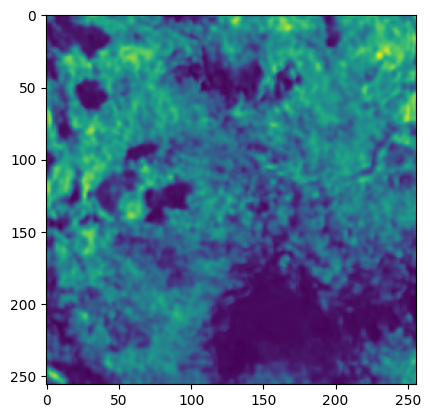

In [274]:
predict_ = tf.squeeze(prediction)
plt.imshow(predict_)

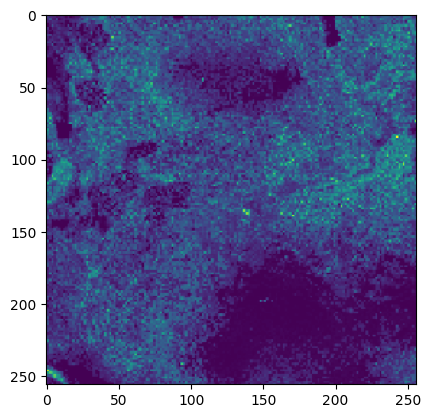

In [272]:
y_true = tf.squeeze(y_test[-2])
plt.imshow(y_true)

In [29]:
#On a larger dataset, this should go pretty well! Our mse is decreasing everytime, all we need is enough images!

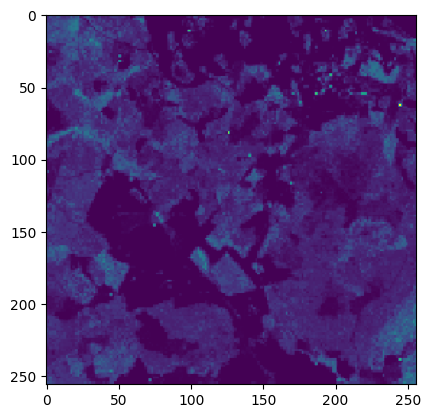

In [31]:
numpydata = tf.squeeze(numpydata)
plt.imshow(numpydata)